# Modelo predictivo

In [5]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import os

# Paso 1: Análisis Exploratorio de Datos (EDA)
predecir el precio de venta de las casas (SalePrice)


In [6]:
# Cargar los datos
data = pd.read_csv('train.csv', sep =',')

In [7]:
# Ver las primeras filas
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [8]:
# Información general del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
# Estadísticas descriptivas
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

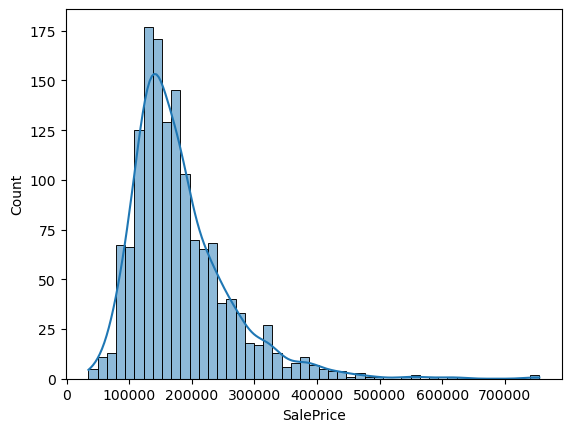

In [10]:
# Visualizar la distribución de SalePrice
sns.histplot(data['SalePrice'], kde=True)
plt.show()

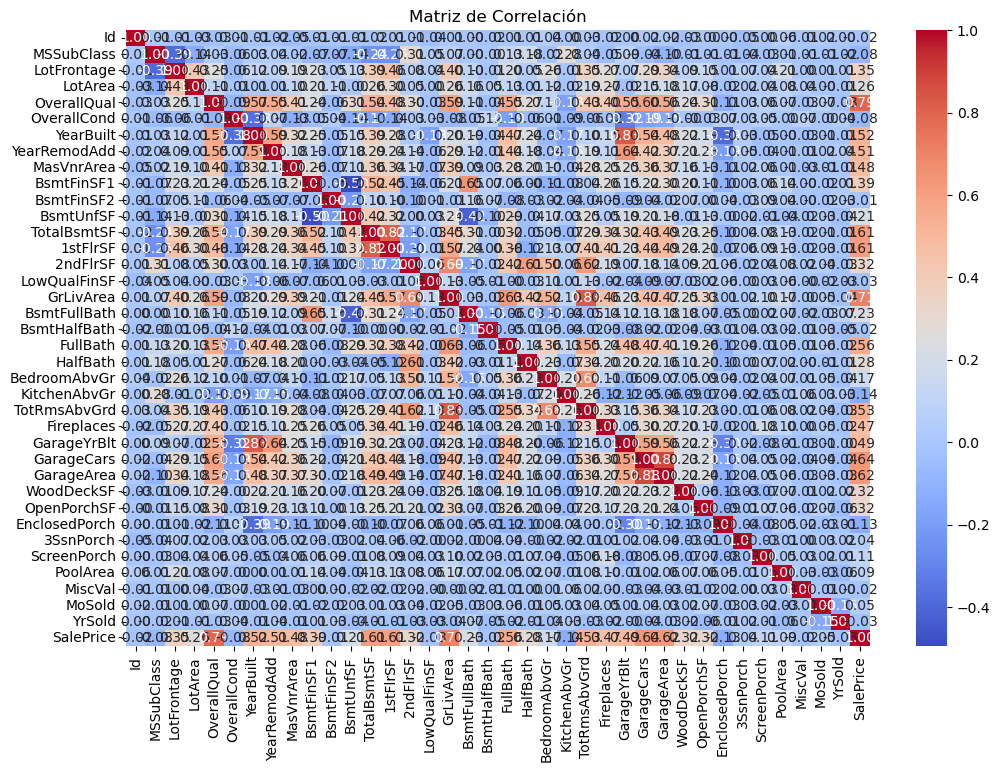

In [12]:
# Matriz de correlación
# Filtrar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
corr_matrix = numeric_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# PASO 2: Procesamiento de datos


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar características y objetivo
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identificar columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar preprocesamiento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Paso 3: Selección del modelo

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Seleccionar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Paso 4: Entrenamiento del modelo

In [19]:
# Entrenar el modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Crear un imputador para rellenar los valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación a los datos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Entrenar el modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Crear un imputador para rellenar los valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación a los datos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

# Paso 5:  Evaluación del modelo

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Aplicar la imputación a X_test (usando el mismo imputador que se ajustó en X_train)
X_test_imputed = imputer.transform(X_test)

# Predecir en el conjunto de prueba (usando los datos imputados)
y_pred = model.predict(X_test_imputed)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')




MSE: 871133137.2011932
R²: 0.8864281500329232


# Paso 6: Ajuste de hiperparámetros

In [28]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Búsqueda en grilla
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')

# Asegúrate de usar los datos imputados (X_train_imputed)
grid_search.fit(X_train_imputed, y_train)

# Mejores parámetros
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


# Paso 7: Predicción

In [29]:
# Aplicar la imputación a X_test (usando el mismo imputador que se ajustó en X_train)
X_test_imputed = imputer.transform(X_test)

# Usar el mejor modelo para predecir
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_imputed)

# Evaluar el mejor modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 873101176.9795766
R²: 0.8861715716651689


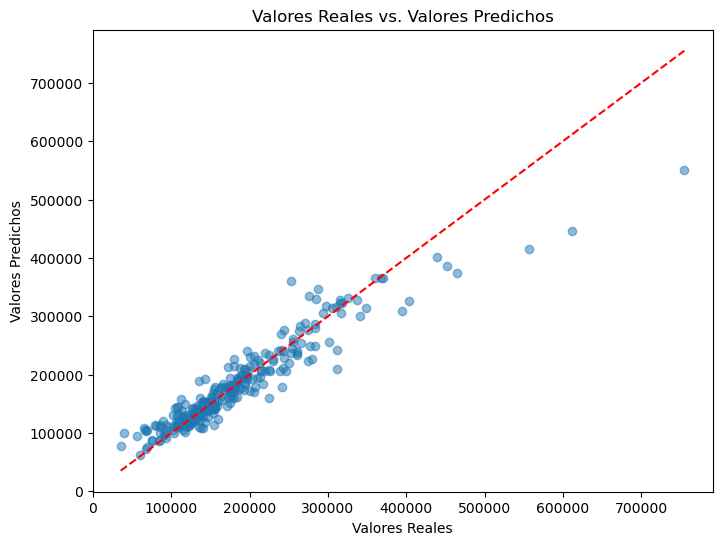

In [30]:
import matplotlib.pyplot as plt

# Gráfico de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.show()

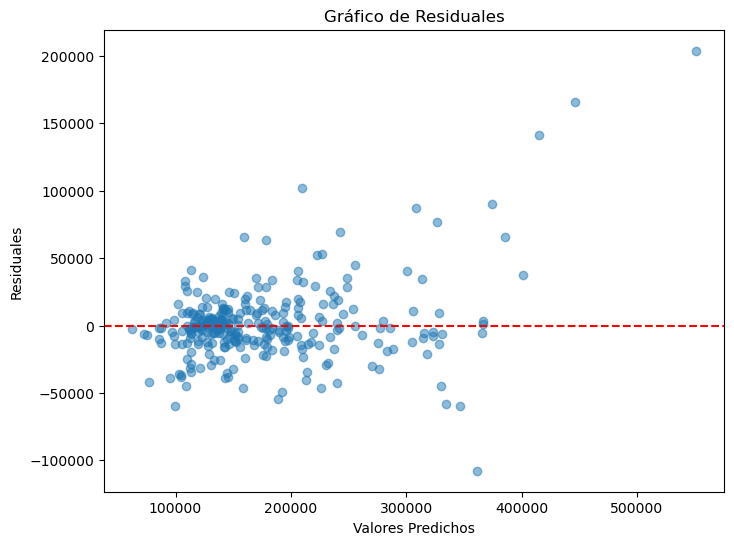

In [31]:
# Calcular los residuales
residuales = y_test - y_pred

# Gráfico de residuales
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuales, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Línea de referencia en y=0
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales')
plt.show()

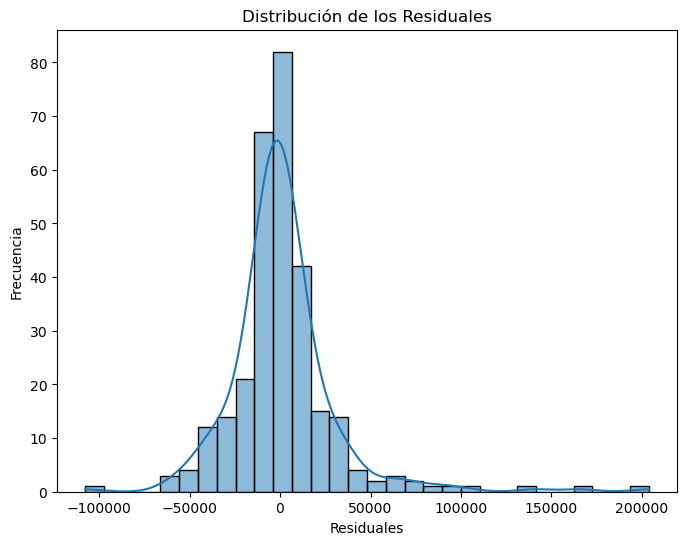

In [32]:
import seaborn as sns

# Histograma de los residuales
plt.figure(figsize=(8, 6))
sns.histplot(residuales, kde=True, bins=30)
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuales')
plt.show()

In [35]:
# Entrenar el modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Crear un imputador para rellenar los valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')

# Aplicar la imputación a los datos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Entrenar el modelo con los datos imputados
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

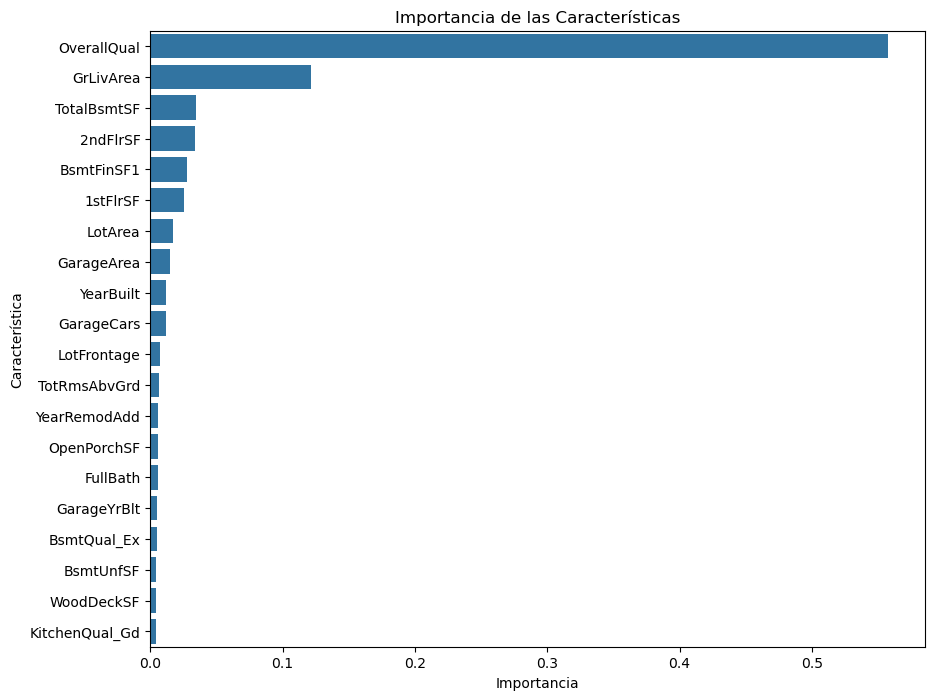

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Asegúrate de que el modelo sea un RandomForestRegressor
if hasattr(model, 'feature_importances_'):
    # Obtener la importancia de las características
    importancias = model.feature_importances_

    # Obtener los nombres de las características
    # Si usaste un ColumnTransformer, combina los nombres de las características numéricas y categóricas
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Si usaste OneHotEncoder, obtén los nombres de las características codificadas
    if hasattr(preprocessor.named_transformers_['cat'], 'get_feature_names_out'):
        categorical_encoded_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    else:
        categorical_encoded_features = categorical_features

    # Combinar los nombres de las características
    feature_names = numeric_features + categorical_encoded_features.tolist()

    # Crear un DataFrame para visualizar las importancias
    importancias_df = pd.DataFrame({
        'Característica': feature_names,
        'Importancia': importancias
    })

    # Ordenar por importancia
    importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

    # Gráfico de barras de las importancias
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importancia', y='Característica', data=importancias_df.head(20))  # Mostrar las 20 más importantes
    plt.title('Importancia de las Características')
    plt.show()
else:
    print("El modelo no tiene el atributo 'feature_importances_'. Asegúrate de usar un modelo como RandomForestRegressor.")